# Displacement-controlled loading of a poroelastic material

This notebook will cover:

* Displacement-controlled experiments
* Working with neo-Hookean poroelastic materials
* Working with dimensional and non-dimensional parameter sets
* Visualising outputs

In [1]:
import ucompress as uc
import matplotlib.pyplot as plt

## Simulations with dimensional parameters

To start, the parameter values and the model must be defined.  These are taken to be from the pre-defined`NeoHookean` parameter set 

In [2]:
pars = uc.parameters.example_parameters.NeoHookean()

print(pars)

Dimensional parameter values
---------------------------------------
R = 5.00e-03
E_m = 5.00e+04
nu_m = 0.00e+00
k_0 = 2.00e-13
phi_0 = 8.00e-01
lam_z = 5.00e-01
beta_r = 1.00e+00
beta_z = 1.00e+00
F = -1.00e+00
t_start = 1.00e-01
t_end = 1.00e+04

Computational parameter values
-----------------------------------------
N = 40
Nt = 200
t_spacing = log



The axial strech is fixed at $\lambda_z = 0.5$, corresponding to an imposed axial strain of $\epsilon_z = 1 - \lambda_z = 0.5$.  The value of the applied force $F = -1$ N does not matter for this simulation.  The other parameters are explained in Notebook 01.

Now we define the model, which requires choosing the mechanics (stress-strain relation) and the permeability of the material.  In this case, we choose a neo-Hookean law and use a permeability that is constant in the deformed (Eulerian) state.  We build the model using the `Poroelastic` class

In [3]:
# Define the mechanics (stress-strain law)
mech = uc.mechanics.NeoHookean()

# Define the permeability
perm = uc.permeability.Constant()

# Build the model
model = uc.base_models.Poroelastic(
    mechanics = mech,
    permeability = perm,
    parameters = pars)

The problem for a displacement-controlled experiment is set up using the `DisplacementControlled` class from the experiments module:

In [4]:
problem = uc.experiments.DisplacementControlled(model, pars)

### Computing the initial response

First, the initial (also called instantaneous) response of the sample is calculated using the `initial_response` method.  This returns an object from the `Solution` class.  The force on the platten is then printed to the screen:

In [5]:
# compute the initial response
sol_instant = problem.initial_response()

# print the force to the screen
print(f'Initial force is {sol_instant.F:.2f} N')

Initial force is -6.87 N


### Computing the equilibrium response

It can also be useful to calculate the equilibrium response of a material.  This is possible using the `steady_response` method.

In [7]:
# compute the steady (equilibrium) response
sol_steady = problem.steady_response()

# print the force to the screen
print(f'Equilibrium force is {sol_steady.F:.2f} N')

Equilibrium force is -2.95 N


### Calculating the time-dependent response

The time-dependent response to compression can be calculated by calling the `transient_response` method.

In [8]:
sol = problem.transient_response()

--------------------------------
Transient step
Solver converged
Average number of Newton iterations per time step: 1.1


Having simulated the experiment, the force on the platten is plotted as a function of time.  We also plot the instantaneous and equilibrium forces too.

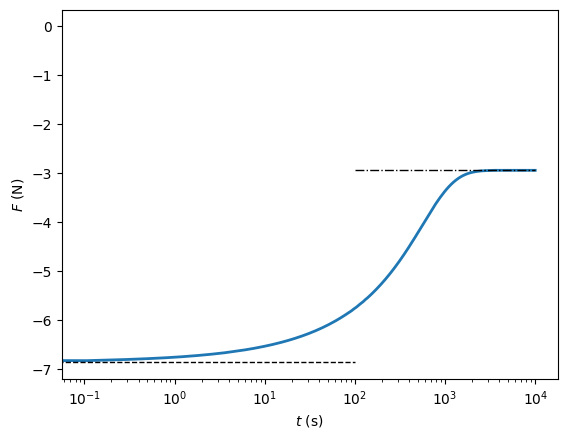

In [35]:
plt.semilogx(sol.t, sol.F, lw = 2)
plt.hlines(sol_instant.F, 1e-2, 1e2, lw = 1, color = 'k', linestyles='--')
plt.hlines(sol_steady.F, 1e2, 1e4, lw = 1, color = 'k', linestyles='-.')
plt.xlabel('$t$ (s)')
plt.ylabel('$F$ (N)')
plt.show()

## Visualising outputs and the Solution object

`Solution` objects contain information about the solution.  Variables are defined as attributes.  Printing a solution object provides information about the variables/attributes that it contains

In [23]:
print(sol_instant)

Solution object with attributes
t: time
r: radial coordinate in the undeformed state
u: radial displacement
p: fluid pressure
lam_z: axial stretch
F: force on the platten
J: Jacobian determinant
phi: porosity
fluid_load_fraction: fluid load fraction


The instantaneous radial displacement can be plotted as follows

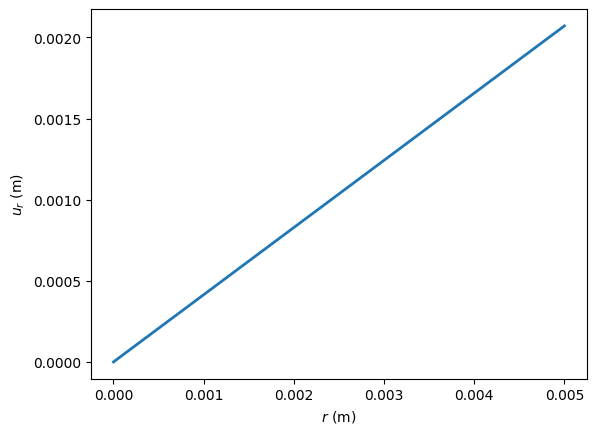

In [26]:
plt.plot(sol_instant.r, sol_instant.u, lw = 2)
plt.xlabel('$r$ (m)')
plt.ylabel('$u_r$ (m)')
plt.show()

For time-dependent simulations, spatio-temporal variables are stored as 2D NumPy arrays such that rows correspond to spatial grid points and columns correspond to time points.  The fluid pressure can then be plotted at different times as follows:

Text(0, 0.5, '$p$ (Pa)')

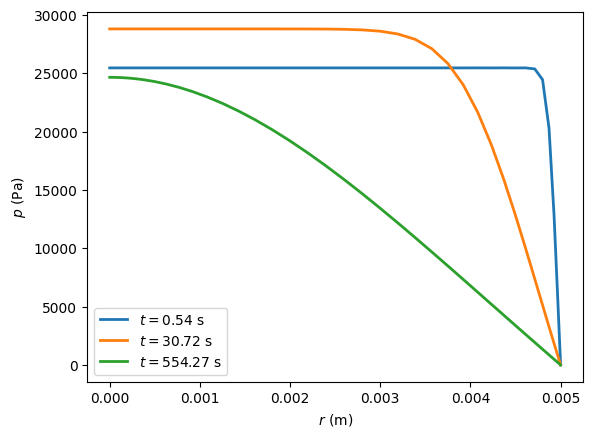

In [34]:
time_index = [30, 100, 150]
for n in time_index:
    label = f'$t = {sol.t[n]:.2f}$ s'
    plt.plot(sol.r, sol.p[:, n], lw = 2, label = label)

plt.legend()
plt.xlabel('$r$ (m)')
plt.ylabel('$p$ (Pa)')

## Simulations with non-dimensional parameters

Using non-dimensional parameters can improve solver performance, leading to faster simulations.  All of the example parameter sets contain methods for non-dimensionalising them.  

In [37]:
pars_nondim = uc.parameters.example_parameters.NeoHookean(nondim = True)

We can build a new model using the same code as above

In [38]:
model_nondim = uc.base_models.Poroelastic(mechanics = mech,
                                          permeability = perm,
                                          parameters = pars_nondim)

For complex models, re-building models this way can be slow, as it requires re-evaluating the symbolic model and converting it into NumPy functions.  Thus, one can assign a new parameter set to an existing model using the `assign` method:

In [39]:
# Assigning a new parameter set to the existing model
model.assign(pars_nondim)

We will now simulate the non-dimensional model

In [ ]:
# Create an experiment
exp